In [14]:
import ast
import pandas as pd
import matplotlib.pyplot as plt

#Loading data
df = pd.read_csv("hf://datasets/lukebarousse/data_jobs/data_jobs.csv")

#Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
#converted to list
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [15]:
df_DA_US = df[(df['job_title_short']=='Data Analyst') & (df['job_country']=='United States')].copy()
       

*df_DA_US.dropna(subset=['salary_year_avg']):*

This works on the entire DataFrame.

It looks at the column salary_year_avg and drops any rows where this column is NaN.

You get back a DataFrame with all columns, but rows with missing salary values are removed.

*df_DA_US['salary_year_avg'].dropna():*

This works on just one column (Series).

It drops the NaN values from that Series.

You get back a Series of non-missing values from salary_year_avg only — no other columns.



In [16]:
df_DA_US = df_DA_US.dropna(subset='salary_year_avg')

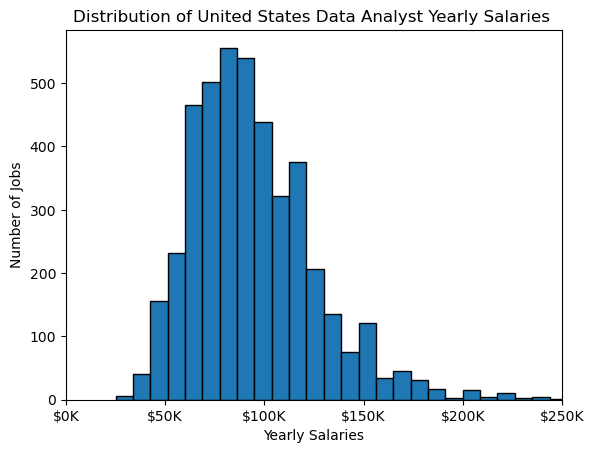

In [22]:
##Ploting Histogram
df_DA_US['salary_year_avg'].plot(kind='hist', bins=40, edgecolor='black')
plt.xlim(0,250000)
plt.title('Distribution of United States Data Analyst Yearly Salaries ')
plt.xlabel('Yearly Salaries')
plt.ylabel('Number of Jobs')

##Format the x-axis
# Get the current Axes object (the chart area) for further customization
ax = plt.gca()

# Format the y-axis to show salaries in $K (thousands) instead of raw numbers
# Example: 80000 becomes "$80K"
ax.xaxis.set_major_formatter(
    plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}K')
)